# Titanic Survival

In [193]:
import seaborn as sns
df = sns.load_dataset('titanic')

In [194]:
df['deck'] = df['deck'].fillna(df['deck'].mode()[0])
df["age"] = df["age"].fillna(df['age'].mean())
df['embark_town'] = df['embark_town'].fillna(df['embark_town'].mode()[0])
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

In [195]:
df.drop(["alive","class","embark_town","adult_male"],axis='columns',inplace=True)

In [196]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['embarked'] = le.fit_transform(df['embarked'])
df['deck'] = le.fit_transform(df['deck'])
df['alone'] = le.fit_transform(df['alone'])
df['who'] = le.fit_transform(df['who'])

In [197]:
y = df['survived']
X = df.drop(columns='survived')

In [198]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [199]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
clf = MultinomialNB()
clf.fit(X_train,y_train)

MultinomialNB()

In [200]:
y_pred = clf.predict(X_test)

In [201]:
from sklearn.metrics import classification_report, mean_squared_error, mean_absolute_error, r2_score, accuracy_score, confusion_matrix

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

a = accuracy_score(y_test, y_pred)
print("Accuracy Score:", a)

cm= confusion_matrix(y_test, y_pred)
print("Confusion Matrix : ")
print(cm)

print("Full report : ")
print(classification_report(y_test, y_pred))

Mean Squared Error: 0.29608938547486036
Mean Absolute Error: 0.29608938547486036
R-squared: -0.2981663929939793
Accuracy Score: 0.7039106145251397
Confusion Matrix : 
[[98 18]
 [35 28]]
Full report : 
              precision    recall  f1-score   support

           0       0.74      0.84      0.79       116
           1       0.61      0.44      0.51        63

    accuracy                           0.70       179
   macro avg       0.67      0.64      0.65       179
weighted avg       0.69      0.70      0.69       179



<Axes: >

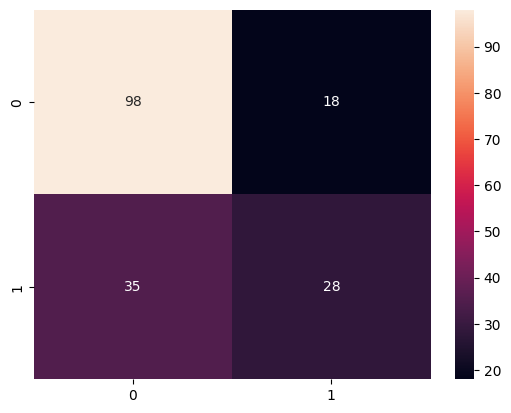

In [202]:
sns.heatmap(cm, annot=True)

# Spam Detect

In [203]:
import pandas as pd
df = pd.read_csv('./spam.csv')

In [204]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Category'] = le.fit_transform(df['Category'])

In [205]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.Message,df.Category)

In [206]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X_train_count = vectorizer.fit_transform(X_train.values)

In [207]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_count,y_train)

MultinomialNB()

In [208]:
X_test_count = vectorizer.transform(X_test)
y_pred = model.predict(X_test_count)

In [209]:
from sklearn.metrics import classification_report, mean_squared_error, mean_absolute_error, r2_score, accuracy_score, confusion_matrix

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

a = accuracy_score(y_test, y_pred)
print("Accuracy Score:", a)

cm= confusion_matrix(y_test, y_pred)
print("Confusion Matrix : ")
print(cm)

print("Full report : ")
print(classification_report(y_test, y_pred))

Mean Squared Error: 0.014357501794687724
Mean Absolute Error: 0.014357501794687724
R-squared: 0.8781117381983637
Accuracy Score: 0.9856424982053122
Confusion Matrix : 
[[1200    3]
 [  17  173]]
Full report : 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1203
           1       0.98      0.91      0.95       190

    accuracy                           0.99      1393
   macro avg       0.98      0.95      0.97      1393
weighted avg       0.99      0.99      0.99      1393



<Axes: >

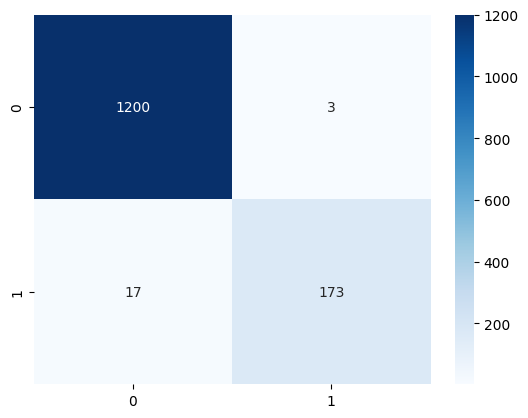

In [210]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Wine Classification

In [211]:
from sklearn.datasets import load_wine
dataset = load_wine()
import pandas as pd
df = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)

In [212]:
X = df
y = dataset.target

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [213]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [214]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train,y_train)

GaussianNB()

In [215]:
y_pred = clf.predict(X_test)

In [216]:
from sklearn.metrics import classification_report, mean_squared_error, mean_absolute_error, r2_score, accuracy_score, confusion_matrix

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

a = accuracy_score(y_test, y_pred)
print("Accuracy Score:", a)

cm= confusion_matrix(y_test, y_pred)
print("Confusion Matrix : ")
print(cm)

print("Full report : ")
print(classification_report(y_test, y_pred))

Mean Squared Error: 0.05555555555555555
Mean Absolute Error: 0.05555555555555555
R-squared: 0.8907435508345979
Accuracy Score: 0.9444444444444444
Confusion Matrix : 
[[17  1  0]
 [ 0 12  1]
 [ 0  0  5]]
Full report : 
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        18
           1       0.92      0.92      0.92        13
           2       0.83      1.00      0.91         5

    accuracy                           0.94        36
   macro avg       0.92      0.96      0.93        36
weighted avg       0.95      0.94      0.95        36



<Axes: >

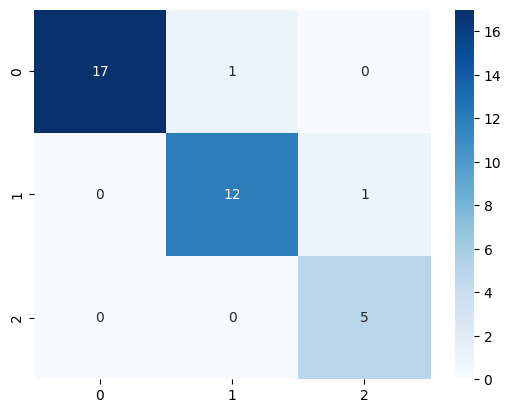

In [217]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')